### Library Imports

In [26]:
import numpy as np
import plotly.graph_objects as go
from scipy.integrate import quad
from scipy.special import roots_legendre
from numpy.polynomial import legendre as leg
import matplotlib.pyplot as plt

---

# Method 1

---

C:\Users\Aaron\AppData\Local\Temp\ipykernel_11420\1993484397.py:2: RuntimeWarning:

divide by zero encountered in divide



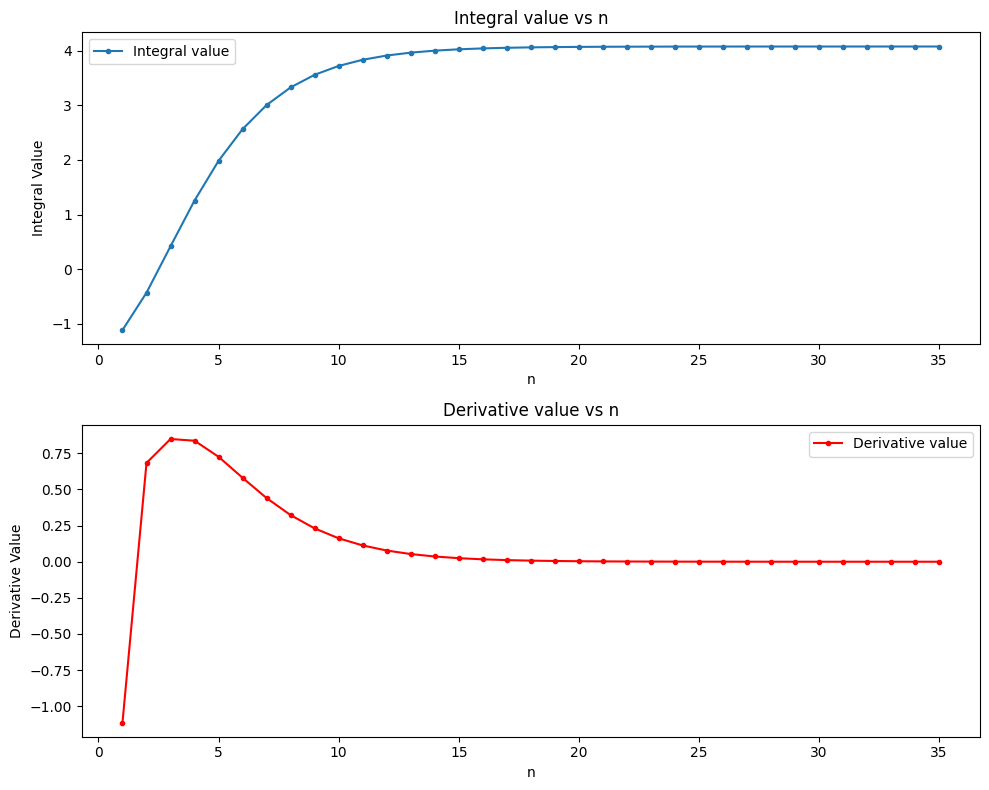

Final value of n: 70
Final integral value: 4.075


In [32]:
def f(x):
    return 1 / (2 - np.sqrt(x))

def gaussian_quadrature(func, a, b, n_points):
    x, w = roots_legendre(n_points)
    transformed_x = 0.5 * (b - a) * x + 0.5 * (a + b)
    fx = func(transformed_x)
    return 0.5 * (b - a) * np.sum(w * fx)

def adaptive_quadrature(func, a, b, n_points):
    # Split points around the singularity
    split_point1 = 3.99
    split_point2 = 4.01
    
    # Integrate over the three subintervals
    integral1 = gaussian_quadrature(func, a, split_point1, n_points)
    integral2 = gaussian_quadrature(func, split_point1, split_point2, n_points)
    integral3 = gaussian_quadrature(func, split_point2, b, n_points)
    
    # Return the sum of the three integrals
    return integral1 + integral2 + integral3

integral_values = []
derivatives = []
n_points = 1
prev_integral = 0
first_iteration = True

while True:
    current_integral = adaptive_quadrature(f, 0, 5, n_points)

    if np.isinf(current_integral):
        n_points += 1
        continue

    derivative = current_integral - prev_integral
    integral_values.append(current_integral)
    derivatives.append(derivative)

    if not first_iteration and abs(derivative) < 1e-5:
        break
        
    prev_integral = current_integral
    first_iteration = False
    n_points += 1



# Generate ns based on the length of integral_values
ns = list(range(1, len(integral_values) + 1))

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(ns, integral_values, '-o', markersize=3, label="Integral value")
axs[0].set_title("Integral value vs n")
axs[0].set_xlabel("n")
axs[0].set_ylabel("Integral Value")
axs[0].legend()

axs[1].plot(ns, derivatives, '-o', markersize=3, color="red", label="Derivative value")
axs[1].set_title("Derivative value vs n")
axs[1].set_xlabel("n")
axs[1].set_ylabel("Derivative Value")
axs[1].legend()

plt.tight_layout()
plt.show()

# Printing the final value of n and the integral value
print(f"Final value of n: {n_points}")
print(f"Final integral value: {current_integral:.3f}")

 To understand how the roots_legendre is working.... here is a more manual approach

$$
\int_{a}^{b} f(x) \, dx \approx \sum_{i=1}^{n} w_i \cdot f(x_i)
$$

In [28]:
def f(x):
    return 1 / (2 - np.sqrt(x))

def manual_roots_legendre(n):
    # Get the coefficients of the Legendre polynomial of degree n
    coeffs = leg.leg2poly(leg.Legendre.basis(n).coef)
    
    # Find the roots of the Legendre polynomial
    roots = np.roots(coeffs)
    
    # Compute the coefficients of the derivative of the Legendre polynomial
    coeffs_deriv = leg.legder(coeffs)
    
    # Evaluate the derivative at the roots
    values_deriv = np.polyval(coeffs_deriv, roots)
    
    # Compute the weights
    weights = 2 / ((1 - roots**2) * values_deriv**2)
    
    return roots, weights

def gaussian_quadrature(func, a, b, n_points):
    x, w = manual_roots_legendre(n_points)
    transformed_x = 0.5 * (b - a) * x + 0.5 * (a + b)
    fx = func(transformed_x)
    
    return 0.5 * (b - a) * np.sum(w * fx)

# Method 2

---

In [29]:
# Define the function to be integrated
def f(x):
    return 1 / (2 - np.sqrt(x))

# Integrate the function from 0 to 3.99 and from 4.01 to 5
integral_value_1, _ = quad(f, 0, 3.99999)
integral_value_2, _ = quad(f, 4.00001, 5)

# Sum the two integrals
total_integral = integral_value_1 + integral_value_2

print(f"Value of I from 0 to 5: {total_integral:.5f}")


Value of I from 0 to 5: 4.07500
